<a href="https://colab.research.google.com/github/oomti/minecraft-mmog/blob/master/technical_documentation/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from numpy.random import random as rand
import scipy.spatial as scp
import scipy as sp
import matplotlib.pyplot as plt
import scipy.cluster as clr


In [0]:
N = np.int(np.floor(np.absolute(np.random.standard_normal())*30))
N=1000
pointsX = (rand((N,1))*1000)
pointsY = (rand((N,1))*1000)
points = np.concatenate((pointsX, pointsY),axis=1)

In [6]:
print(N)
print(points)

1000
[[698.04607051 488.29850744]
 [439.51121119 777.16181594]
 [421.72212343 331.51509006]
 ...
 [357.35885435   1.980722  ]
 [825.41748134 621.86778259]
 [513.57771719 915.01440561]]


In [7]:
distMatrix = scp.distance.cdist(points, points, 'euclidean')
distMatrix.view()

array([[  0.        , 387.66259103, 317.70420786, ..., 593.77838263,
        184.56496841, 464.88173886],
       [387.66259103,   0.        , 446.00163221, ..., 779.52212165,
        415.98063193, 156.49020349],
       [317.70420786, 446.00163221,   0.        , ..., 335.76112065,
        497.26715964, 590.68511184],
       ...,
       [593.77838263, 779.52212165, 335.76112065, ...,   0.        ,
        776.7488952 , 926.30170058],
       [184.56496841, 415.98063193, 497.26715964, ..., 776.7488952 ,
          0.        , 427.99413675],
       [464.88173886, 156.49020349, 590.68511184, ..., 926.30170058,
        427.99413675,   0.        ]])

In [0]:
tri = scp.Delaunay(points)

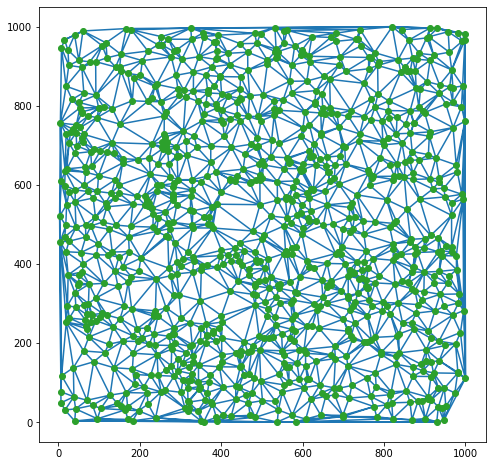

In [9]:
plt.figure(figsize=(8,8))
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

<Figure size 576x576 with 0 Axes>

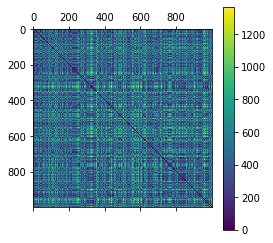

In [10]:
plt.figure(figsize=(8,8))
plt.matshow(distMatrix, );
plt.colorbar()
plt.show()

In [0]:
centroid , label = clr.vq.kmeans2(points,5)
centroid
label
counts = np.bincount(label)

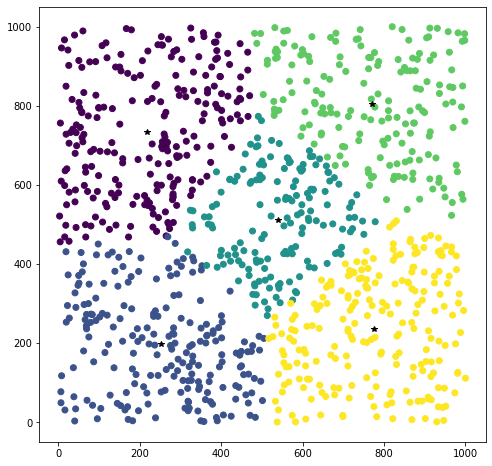

In [12]:
import matplotlib
fig = plt.figure(figsize=(8,8))
plt.scatter(points[:,0], points[:,1],c=label)
plt.plot(centroid[:,0],centroid[:,1], "k*")

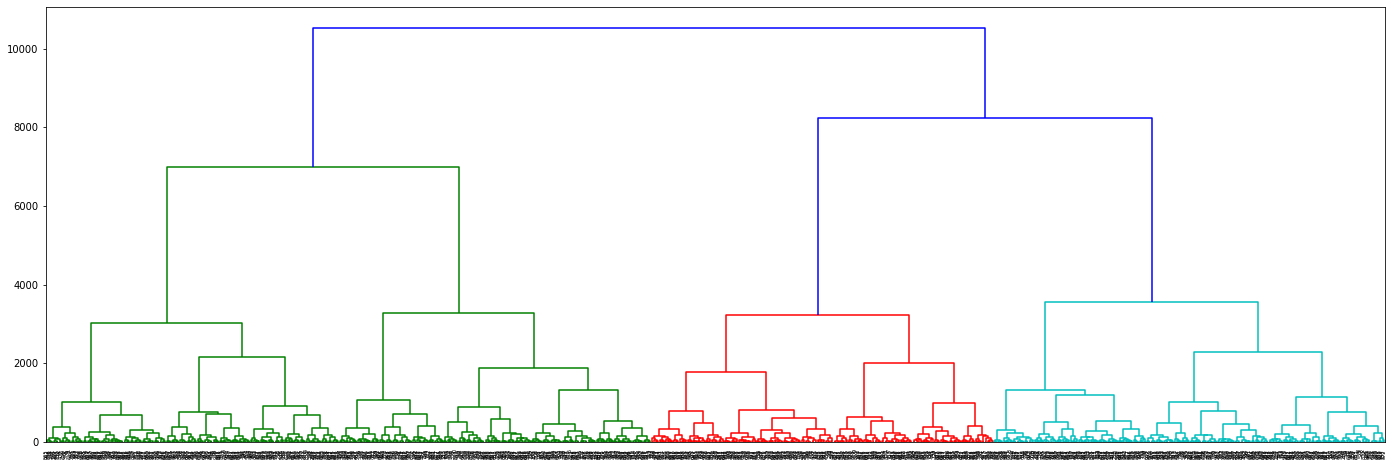

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, ward
Z = ward(points)
plt.figure(figsize=(24,8))
dn = dendrogram(Z)
plt.show()

[  0  90  63  66  78  66  89  55  81  59  61 114  91  87]


IndexError: ignored

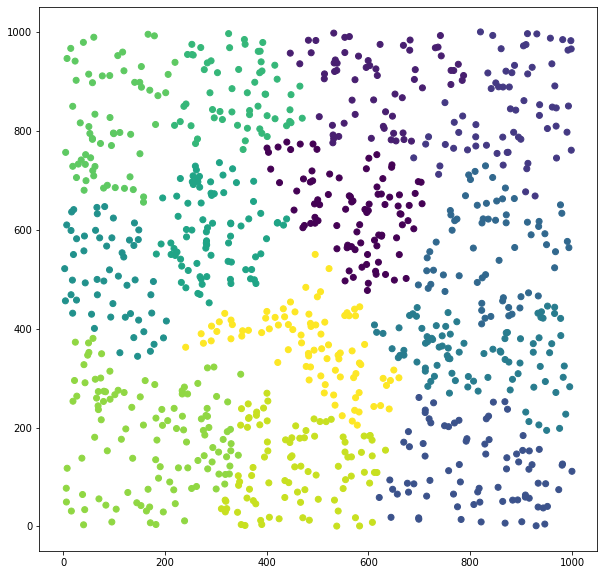

In [15]:
clabel=fcluster(Z, t=1500, criterion='distance')
print(np.bincount(clabel))
plt.figure(figsize=(10,10))
plt.scatter(points[:,0], points[:,1],c=clabel)
for i in range(np.bincount(clabel).size):
  plt.contour()

In [0]:
C